In [1]:
import pandas as pd
import seaborn as sns
import re,json,nltk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

No Warning Shown


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sa-bangla-binary-restaurant-review/Bert_Preprocessed_Restaurant_Review_Dataset.xlsx


In [3]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 469.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_excel('/kaggle/input/sa-bangla-binary-restaurant-review/Bert_Preprocessed_Restaurant_Review_Dataset.xlsx')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1431 non-null   int64 
 1   Unnamed: 0.1  1431 non-null   int64 
 2   Reviews       1431 non-null   object
 3   Sentiment     1431 non-null   object
 4   Text          1431 non-null   object
 5   Label         1431 non-null   int64 
 6   Token         1431 non-null   object
 7   Token_ID      1431 non-null   object
dtypes: int64(3), object(5)
memory usage: 89.6+ KB


In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Reviews,Sentiment,Text,Label,Token,Token_ID
0,501,501,পরিবেশ খাদ্য ও সেবা ছিল মহান,positive,পরিবেশ খাদ্য ও সেবা ছিল মহান,1,"['পরিবেশ', 'খাদ', '##য', 'ও', 'সেবা', 'ছিল', '...","[2679, 19673, 9294, 2038, 2872, 2072, 4444]"
1,264,264,খাবারগুলো এত ইয়াম্মিইইইই...ইচ্ছে করে প্রতিদিন ...,positive,খাবারগুলো এত ইয়াম্মিইইইইইচ্ছে করে প্রতিদিন খাই,1,"['খাবার', '##গলে', '##া', 'এত', 'ই', '##যাম', ...","[2545, 64716, 2395, 2592, 2554, 71968, 6968, 2..."
2,405,405,শহরে সেরা মুরগির রেসিপি জন্য নিঃসন্দেহে জায়গা,positive,শহরে সেরা মুরগির রেসিপি জন্য নিঃসন্দেহে জায়গা,1,"['শহরে', 'সেরা', 'মর', '##গির', 'রেসিপি', 'জন'...","[2881, 2617, 18849, 25654, 10643, 2181, 9294, ..."
3,435,435,আজ রাতে আমি কাবাব ও খাদ্য এ আমার পরিবারের সাথে...,positive,আজ রাতে আমি কাবাব ও খাদ্য এ আমার পরিবারের সাথে...,1,"['আজ', 'রাতে', 'আমি', 'কাবাব', 'ও', 'খাদ', '##...","[2145, 2736, 2169, 12677, 2038, 19673, 9294, 2..."
4,1001,1001,বেইলি রোড শাখাতে সুপার ধীর সেবা,negative,বেইলি রোড শাখাতে সুপার ধীর সেবা,0,"['বেইলি', 'রে', '##াড', 'শাখা', '##তে', 'সপ', ...","[14379, 4972, 35897, 3574, 2200, 73835, 3187, ..."


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

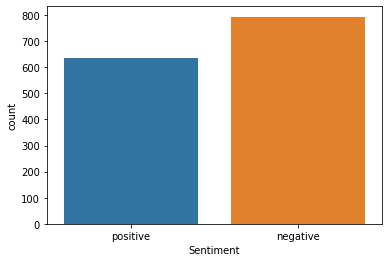

In [6]:
sns.countplot(df['Sentiment'])

In [7]:
df.Sentiment.value_counts(), len(df)

(negative    794
 positive    637
 Name: Sentiment, dtype: int64,
 1431)

In [8]:
df=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'decision tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'multinomial naive bayes':{
        'model':MultinomialNB(),
        'params':{
            'alpha':[.10,.15,.20,.25]
        }
    },
    'k nearest neibourgh':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors': [3,4,5,6,7]
            
        }
    },
    'Stochastic Gradient Descent':{
        'model':SGDClassifier(),
        'params':{
            'loss':['log']

        }
    },
    'XGBoost':{
        'model': XGBClassifier(),
        'params':{
            'booster':['gbtree', 'gblinear','dart']
        }
    }

}

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
x_bow = vect.fit_transform(df['Text'])
x_train, x_test, y_train, y_test = train_test_split(x_bow,df['Label'] , test_size=0.2, random_state=42)

In [12]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score.sort_values(by=['best_score'],ascending=False) 

[20:56:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,model,best_score,best_params
3,logistic_regression,0.782349,{'C': 1}
0,svm,0.773615,"{'C': 20, 'kernel': 'rbf'}"
7,XGBoost,0.770999,{'booster': 'gbtree'}
4,multinomial naive bayes,0.759622,{'alpha': 0.1}
1,random_forest,0.748215,{'n_estimators': 10}
6,Stochastic Gradient Descent,0.743005,{'loss': 'log'}
2,decision tree,0.708040,{'criterion': 'entropy'}
5,k nearest neibourgh,0.650341,{'n_neighbors': 4}


In [13]:
y_pred=clf.best_estimator_.predict(x_test)
y_pred = y_pred.reshape(-1,1)
print('Classification Report BOW')
print(classification_report(y_test,y_pred))

Classification Report BOW
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       154
           1       0.77      0.76      0.76       133

    accuracy                           0.78       287
   macro avg       0.78      0.78      0.78       287
weighted avg       0.78      0.78      0.78       287



In [14]:
#TF-IDF unigram
tfidf_unigram = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
x_tfidf_unigram= tfidf_unigram.fit_transform(df['Text'])
x_train, x_test, y_train, y_test = train_test_split(x_tfidf_unigram,df['Label'] , test_size=0.2, random_state=42)

In [15]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score.sort_values(by=['best_score'],ascending=False) 


[20:57:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,model,best_score,best_params
0,svm,0.876752,"{'C': 1, 'kernel': 'linear'}"
4,multinomial naive bayes,0.874125,{'alpha': 0.25}
6,Stochastic Gradient Descent,0.870635,{'loss': 'log'}
3,logistic_regression,0.869769,{'C': 5}
5,k nearest neibourgh,0.853137,{'n_neighbors': 6}
7,XGBoost,0.847047,{'booster': 'gblinear'}
1,random_forest,0.797162,{'n_estimators': 10}
2,decision tree,0.779717,{'criterion': 'entropy'}


In [16]:
y_pred=clf.best_estimator_.predict(x_test)
y_pred = y_pred.reshape(-1,1)
print('Classification Report TF-IDF Unigram')
print(classification_report(y_test,y_pred))

Classification Report TF-IDF Unigram
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       154
           1       0.92      0.84      0.88       133

    accuracy                           0.89       287
   macro avg       0.90      0.89      0.89       287
weighted avg       0.89      0.89      0.89       287



In [17]:
#TF-IDF Bigram
tfidf_bigram = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
x_tfidf_bigram = tfidf_bigram.fit_transform(df['Text'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tfidf_bigram,df['Label'] , test_size=0.2, random_state=42)

In [18]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score.sort_values(by=['best_score'],ascending=False) 


[20:57:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,model,best_score,best_params
0,svm,0.884624,"{'C': 10, 'kernel': 'linear'}"
4,multinomial naive bayes,0.877633,{'alpha': 0.2}
6,Stochastic Gradient Descent,0.875879,{'loss': 'log'}
3,logistic_regression,0.870639,{'C': 10}
5,k nearest neibourgh,0.868004,{'n_neighbors': 6}
7,XGBoost,0.847889,{'booster': 'gblinear'}
2,decision tree,0.798100,{'criterion': 'entropy'}
1,random_forest,0.792833,{'n_estimators': 10}


In [19]:
y_pred=clf.best_estimator_.predict(x_test)
y_pred = y_pred.reshape(-1,1)
print('Classification Report TF-IDF Bigram')
print(classification_report(y_test,y_pred))

Classification Report TF-IDF Bigram
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       154
           1       0.88      0.80      0.83       133

    accuracy                           0.85       287
   macro avg       0.86      0.85      0.85       287
weighted avg       0.86      0.85      0.85       287



In [20]:
#TF-IDF Trigram
tfidf_trigram = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
x_tfidf_trigram = tfidf_trigram.fit_transform(df['Text'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tfidf_trigram,df['Label'] , test_size=0.2, random_state=42)

In [21]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score.sort_values(by=['best_score'],ascending=False) 


[20:58:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,model,best_score,best_params
4,multinomial naive bayes,0.881127,{'alpha': 0.25}
0,svm,0.875883,"{'C': 10, 'kernel': 'linear'}"
6,Stochastic Gradient Descent,0.871505,{'loss': 'log'}
3,logistic_regression,0.868881,{'C': 10}
5,k nearest neibourgh,0.863637,{'n_neighbors': 6}
7,XGBoost,0.859251,{'booster': 'gblinear'}
1,random_forest,0.796346,{'n_estimators': 10}
2,decision tree,0.785846,{'criterion': 'entropy'}


In [22]:
y_pred=clf.best_estimator_.predict(x_test)
y_pred = y_pred.reshape(-1,1)
print('Classification Report TF-IDF Trigram')
print(classification_report(y_test,y_pred))

Classification Report TF-IDF Trigram
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       154
           1       0.89      0.77      0.82       133

    accuracy                           0.85       287
   macro avg       0.85      0.84      0.84       287
weighted avg       0.85      0.85      0.85       287

